# Analsis de videojuegos mas vendidos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Leer archivo csv
main_path = "/Users/erick/OneDrive/Documentos/Python/Curso/Practica_DataScience/dato.csv"
df = pd.read_csv(main_path)

In [3]:
df.head()

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score_Class
0,Wii,Sports,Nintendo,"41,36","28,96","3,77","8,45","82,54",E,Bueno
1,Wii,Racing,Nintendo,"15,68","12,8","3,79","3,29","35,57",E,Excelente
2,Wii,Sports,Nintendo,"15,61","10,95","3,28","2,95","32,78",E,Excelente
3,DS,Platform,Nintendo,"11,28","9,15","6,5","2,88","29,81",E,Excelente
4,Wii,Misc,Nintendo,"13,96","9,18","2,93","2,84","28,92",E,Malo


In [4]:
#Cambiemos los headers a español
headers_espanol = ['Plataforma','Genero','Editor', 'EU_Ventas','Europa_Ventas','Japon_Ventas','Otras_Ventas','Globales_Ventas','Clasificacion','Critica']
df = pd.read_csv(main_path,header=None,names=headers_espanol,skiprows=1)
df.head()

,Plataforma,Genero,Editor,EU_Ventas,Europa_Ventas,Japon_Ventas,Otras_Ventas,Globales_Ventas,Clasificacion,Critica
0,Wii,Sports,Nintendo,"41,36","28,96","3,77","8,45","82,54",E,Bueno
1,Wii,Racing,Nintendo,"15,68","12,8","3,79","3,29","35,57",E,Excelente
2,Wii,Sports,Nintendo,"15,61","10,95","3,28","2,95","32,78",E,Excelente
3,DS,Platform,Nintendo,"11,28","9,15","6,5","2,88","29,81",E,Excelente
4,Wii,Misc,Nintendo,"13,96","9,18","2,93","2,84","28,92",E,Malo


In [5]:
# Primero debemos saber cuales son los valores unicos de la columna genero
print(df['Genero'].unique())

['Sports' 'Racing' 'Platform' 'Misc' 'Action' 'Puzzle' 'Shooter'
 'Fighting' 'Simulation' 'Role-Playing' 'Adventure' 'Strategy']


In [6]:
#Cambiar los datos dentro de genero a español
#Debemos usar la funcion loc que en este caso, es para las columnas
#Copiamos el df dentro de df1 para ver si corre el codigo
df1 = df.copy()
df1.loc[df['Genero'] == 'Sports', 'Genero'] = 'Deportes'
df1.head()

,Plataforma,Genero,Editor,EU_Ventas,Europa_Ventas,Japon_Ventas,Otras_Ventas,Globales_Ventas,Clasificacion,Critica
0,Wii,Deportes,Nintendo,"41,36","28,96","3,77","8,45","82,54",E,Bueno
1,Wii,Racing,Nintendo,"15,68","12,8","3,79","3,29","35,57",E,Excelente
2,Wii,Deportes,Nintendo,"15,61","10,95","3,28","2,95","32,78",E,Excelente
3,DS,Platform,Nintendo,"11,28","9,15","6,5","2,88","29,81",E,Excelente
4,Wii,Misc,Nintendo,"13,96","9,18","2,93","2,84","28,92",E,Malo


In [7]:
# Como vimos que funcionó, cambiemos los demas
df1.loc[df['Genero'] == 'Racing', 'Genero'] = 'Carreras'
df1.loc[df['Genero'] == 'Platform', 'Genero'] = 'Plataforma'
df1.loc[df['Genero'] == 'Action', 'Genero'] = 'Accion'
df1.loc[df['Genero'] == 'Puzzle', 'Genero'] = 'Rompecabezas'
df1.loc[df['Genero'] == 'Shooter', 'Genero'] = 'Disparos'
df1.loc[df['Genero'] == 'Fighting', 'Genero'] = 'Peleas'
df1.loc[df['Genero'] == 'Simulation', 'Genero'] = 'Simulacion'
df1.loc[df['Genero'] == 'Role-Playing', 'Genero'] = 'Juego-Roles'
df1.loc[df['Genero'] == 'Adventure', 'Genero'] = 'Aventura'
df1.loc[df['Genero'] == 'Strategy', 'Genero'] = 'Estrategia'

In [8]:
#Ahora veamos los cambios hechos 
df1['Genero'].unique()

array(['Deportes', 'Carreras', 'Plataforma', 'Misc', 'Accion',
       'Rompecabezas', 'Disparos', 'Peleas', 'Simulacion', 'Juego-Roles',
       'Aventura', 'Estrategia'], dtype=object)

In [9]:
#Veamos si tenemos nulos
df1.isnull().sum()

Plataforma         0
Genero             0
Editor             0
EU_Ventas          0
Europa_Ventas      0
Japon_Ventas       0
Otras_Ventas       0
Globales_Ventas    0
Clasificacion      0
Critica            0
dtype: int64

In [10]:
#Ahora en total
df1.isnull().sum().sum()

0

In [11]:
plataforma_preferida = df1.groupby('Plataforma').Plataforma.count()
print(plataforma_preferida)
plataforma_preferida = plataforma_preferida.to_list()
print(plataforma_preferida)

Plataforma
3DS      161
DC        14
DS       472
GBA      249
GC       363
PC       734
PS       154
PS2     1169
PS3      790
PS4      255
PSP      401
PSV      125
Wii      493
WiiU      89
X        586
X360     888
XOne     169
Name: Plataforma, dtype: int64
[161, 14, 472, 249, 363, 734, 154, 1169, 790, 255, 401, 125, 493, 89, 586, 888, 169]


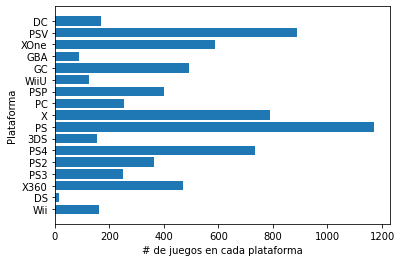

In [12]:
#Grafiquemos
eje_x = df1['Plataforma'].unique()
eje_y = plataforma_preferida
#Creamos grafica
plt.barh(eje_x,eje_y)
#Leyenda en eje y
plt.ylabel("Plataforma")
plt.xlabel('# de juegos en cada plataforma')
plt.show()


In [13]:
df1.head()

,Plataforma,Genero,Editor,EU_Ventas,Europa_Ventas,Japon_Ventas,Otras_Ventas,Globales_Ventas,Clasificacion,Critica
0,Wii,Deportes,Nintendo,"41,36","28,96","3,77","8,45","82,54",E,Bueno
1,Wii,Carreras,Nintendo,"15,68","12,8","3,79","3,29","35,57",E,Excelente
2,Wii,Deportes,Nintendo,"15,61","10,95","3,28","2,95","32,78",E,Excelente
3,DS,Plataforma,Nintendo,"11,28","9,15","6,5","2,88","29,81",E,Excelente
4,Wii,Misc,Nintendo,"13,96","9,18","2,93","2,84","28,92",E,Malo


In [14]:
#Aqui, sumamos todas las ventas de videojuegos de Estados Unidos
ventas_eu = df1['EU_Ventas'].to_list()
for i in range(len(ventas_eu)):
    ventas_eu[i] = ventas_eu[i].replace(",",".")
    ventas_eu[i] = float(ventas_eu[i])

ventas_eu = round(sum(ventas_eu),2)
print(ventas_eu)

2763.49


In [15]:
#Aqui hacemos una funcion para que haga todo lo anterior
def ventas_pais(ventas):
    ventas_total = ventas.to_list()
    for i in range(len(ventas_total)):
        ventas_total[i] = ventas_total[i].replace(",",".")
        ventas_total[i] = float(ventas_total[i])
    ventas_total = round(sum(ventas_total),2)

    return ventas_total

In [16]:
#Aqui sacamos las ventas de videojuegos de cada pais
ventas_japon = ventas_pais(df1['Japon_Ventas'])
ventas_europa = ventas_pais(df1['Europa_Ventas'])
ventas_estados_unidos = ventas_pais(df1['EU_Ventas'])
ventas_otros = ventas_pais(df1['Otras_Ventas'])
#Vamos a convertirlo en una lista
ventas_por_pais = [ventas_japon,ventas_europa,ventas_estados_unidos,ventas_otros]
pais_nombre = ["Japon","Europa","Estados Unidos","Otros paises"]
print(ventas_por_pais)

[445.58, 1653.8, 2763.49, 578.54]


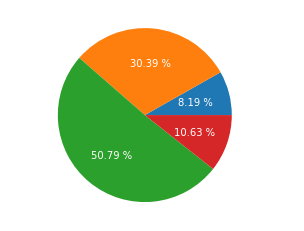

In [17]:
# Ahora grafiquemos
plt.pie(ventas_por_pais, labels = pais_nombre,autopct="%0.2f %%",textprops={'color':"w"})
plt.show()

In [18]:
#Hagamos otro analisis      
df1.head()

,Plataforma,Genero,Editor,EU_Ventas,Europa_Ventas,Japon_Ventas,Otras_Ventas,Globales_Ventas,Clasificacion,Critica
0,Wii,Deportes,Nintendo,"41,36","28,96","3,77","8,45","82,54",E,Bueno
1,Wii,Carreras,Nintendo,"15,68","12,8","3,79","3,29","35,57",E,Excelente
2,Wii,Deportes,Nintendo,"15,61","10,95","3,28","2,95","32,78",E,Excelente
3,DS,Plataforma,Nintendo,"11,28","9,15","6,5","2,88","29,81",E,Excelente
4,Wii,Misc,Nintendo,"13,96","9,18","2,93","2,84","28,92",E,Malo


In [19]:
critica_genero = df1[['Genero','Critica']]
print(df1['Critica'].unique())
#Iterar en las filas
#El [0] es Excelente, [1] es Bueno, [2] es Aceptable, [3] Es Malo



['Bueno' 'Excelente' 'Malo' 'Aceptable']


In [20]:
#Veamos que editor ha hecho mas juegos
mejor_ventas_editor = df1.groupby('Editor').Editor.count().sort_values(ascending=False)
mejores_5_editores_ventas = mejor_ventas_editor[0:5].to_list()


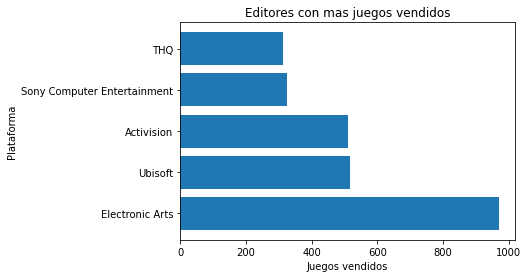

In [21]:
#Grafiquemos
eje_x = mejor_ventas_editor[0:5].index.tolist()
eje_y = mejores_5_editores_ventas
#Creamos grafica
plt.barh(eje_x,eje_y)
#Leyenda en eje y
plt.ylabel("Plataforma")
plt.xlabel('Juegos vendidos')
plt.title('Editores con mas juegos vendidos')
plt.show()

In [41]:
editores_5_mejores = mejor_ventas_editor[0:5].index.tolist()
print(editores_5_mejores)

['Electronic Arts', 'Ubisoft', 'Activision', 'Sony Computer Entertainment', 'THQ']


In [46]:
def counter_Critica(editor):
    counter_marca = [0,0,0,0]
    for index, row in df1.iterrows():
         if row['Editor'] == editor and row['Critica'] == 'Excelente':
            counter_marca[0] += 1
         elif row['Editor'] == editor and row['Critica'] == 'Bueno':
            counter_marca[1] +=1
         elif row['Editor'] == editor and row['Critica'] == 'Aceptable':
            counter_marca[2] +=1
         elif row['Editor'] == editor and row['Critica'] == 'Malo':
            counter_marca[3] +=1
    return counter_marca


In [52]:
print(editores_5_mejores)
#Para tomar todos los valores de la critica de cada marca y hacer analisis
ea_critica = counter_Critica(editores_5_mejores[0])
ubisoft_critica = counter_Critica(editores_5_mejores[1])
activision_critica = counter_Critica(editores_5_mejores[2])
sony_critica = counter_Critica(editores_5_mejores[3])
thq_critica = counter_Critica(editores_5_mejores[4])

['Electronic Arts', 'Ubisoft', 'Activision', 'Sony Computer Entertainment', 'THQ']


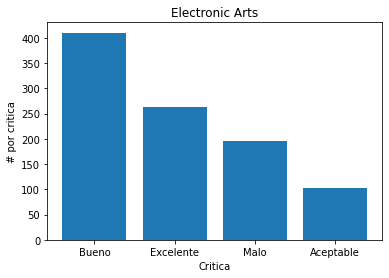

In [60]:
#Grafiquemos Electronic Arts
#Grafiquemos
eje_x = df1['Critica'].unique()
eje_y = ea_critica
#Creamos grafica
plt.bar(eje_x,eje_y)
#Leyenda en ejes
plt.ylabel("# por critica")
plt.xlabel('Critica')
plt.title('Electronic Arts')
plt.show()